## Data Preprocessing

In [27]:
import pandas as pd

DIR = '/home/irteam/wendyunji-dcloud-dir/wendyunji/Archive2/BCME/MARKERS'
marker = pd.read_csv(DIR+'/Cancer/Marker_breast-cancer.csv')
# 셀에서 사용된 마커들
markers = marker.columns

/tmp/ipykernel_4618/1368049887.py:4: DtypeWarning: Columns (9951) have mixed types. Specify dtype option on import or set low_memory=False.
  marker = pd.read_csv(DIR+'/Cancer/Marker_breast-cancer.csv')


In [28]:
import os
file_list = os.listdir('/home/irteam/wendyunji-dcloud-dir/wendyunji/Archive2/BCME/MARKERS/Map')

cancertypes = []
for file in file_list:
    file = file.replace('kegg_genename-map_','')
    file = file.replace('.csv','')
    cancertypes.append(file)

In [29]:
def getMarkers(cancertype):
    
    map = pd.read_csv(DIR + '/Map/kegg_genename-map_'+ cancertype +'.csv')
    
    # map 데이터에서 필요한 행과 열만 추출
    map = pd.DataFrame(map['available_names'])
    map.drop_duplicates(inplace=True)
    map.reset_index(inplace=True)
    
    # map 데이터에서 요소들 추출하여 리스트로 반환
    # 문자열 모으기
    maplf = []
    for i in range(len(map)):
        mapl = map['available_names'][i].split(',')
        maplf += mapl
    
    # 문자열 정리 후 리스트 반환
    paths = []
    for mark in maplf:
        mark = mark.replace(' ','')
        mark = mark.replace('...','')
        paths.append(mark)

    # intersection
    ent = list(set(paths).intersection(markers))
    return ent

In [30]:
# 딕셔너리로 저장하기
dict = {}
for cancertype in cancertypes:
    dict[cancertype] = getMarkers(cancertype)

In [31]:
# breast cancer는 이미 정리가 되어있음.
main = 'breast-cancer'
mainl = dict[main]
cancertypes.remove(main)
print(cancertypes)
print(mainl)

['cancer', 'colorectal-cancer', 'acute-myeloid-leukemia', 'basal-cell-carcinoma', 'bladder-cancer', 'chronic-myeloid-leukemia', 'endometrial-cancer', 'gastric-cancer', 'glioma', 'hepatocellular-carcinoma', 'melanoma', 'non-small-cell-lung-cancer', 'pancreatic-cancer', 'prostate-cancer', 'renal-cell-carcinoma', 'small-cell-lung-cancer', 'thyroid-cancer']
['FGFR1', 'GADD45G', 'GRB2', 'DLL3', 'FZD10', 'ESR1', 'MYC', 'HGF', 'APC2', 'MAPK1', 'TNFSF11', 'FRAT1', 'CDK4', 'RPS6KB1', 'PGR', 'PIK3CA', 'PTEN', 'GSK3B', 'LEF1', 'ERBB2', 'ARAF', 'EGF', 'FRAP1', 'HRAS', 'HES1', 'AKT3', 'SOS1', 'WNT16', 'FLG', 'CSNK1A1L', 'SHC2', 'LRP6', 'JAG1', 'TP53', 'KRAS', 'BAX', 'IGF1', 'CDKN1A', 'DDB2', 'CCND1', 'BRCA1', 'RB1', 'POLQ', 'AXIN1', 'MAP2K1', 'TEP1', 'WNT4', 'NCOA3', 'CTNNB1', 'BAK1', 'NOTCH1', 'FGF1', 'NFKB2', 'KIT', 'HEY1', 'E2F1', 'DVL1', 'RBP3', 'FOS', 'RAC3', 'EGFR', 'POLK', 'BRCA2', 'IGF1R', 'FLT4']


In [32]:
newdict = {}
for cancertype in cancertypes:
    ent = list(set(mainl).intersection(dict[cancertype]))
    print(str(cancertype)+'\t'+str(len(ent))+'\t'+str(ent))
    newdict[cancertype] = ent

cancer	57	['FGFR1', 'GADD45G', 'GRB2', 'DLL3', 'ESR1', 'FZD10', 'MYC', 'HGF', 'APC2', 'MAPK1', 'FRAT1', 'CDK4', 'RPS6KB1', 'PTEN', 'PIK3CA', 'GSK3B', 'LEF1', 'ERBB2', 'ARAF', 'FLG', 'FRAP1', 'EGF', 'HES1', 'HRAS', 'SOS1', 'AKT3', 'WNT16', 'JAG1', 'LRP6', 'TP53', 'BAX', 'IGF1', 'RB1', 'CDKN1A', 'CCND1', 'DDB2', 'POLQ', 'AXIN1', 'MAP2K1', 'TEP1', 'NCOA3', 'CTNNB1', 'BAK1', 'NOTCH1', 'FGF1', 'KIT', 'HEY1', 'E2F1', 'DVL1', 'RBP3', 'FOS', 'RAC3', 'EGFR', 'POLK', 'BRCA2', 'IGF1R', 'FLT4']
colorectal-cancer	30	['GADD45G', 'GRB2', 'MYC', 'HGF', 'APC2', 'MAPK1', 'RPS6KB1', 'PIK3CA', 'GSK3B', 'LEF1', 'ARAF', 'EGF', 'FRAP1', 'HRAS', 'AKT3', 'SOS1', 'TP53', 'KRAS', 'BAX', 'CDKN1A', 'DDB2', 'CCND1', 'POLQ', 'AXIN1', 'MAP2K1', 'CTNNB1', 'POLK', 'FOS', 'EGFR', 'BAK1']
acute-myeloid-leukemia	16	['PIK3CA', 'GRB2', 'LEF1', 'MAP2K1', 'ARAF', 'FRAP1', 'AKT3', 'HRAS', 'MYC', 'HGF', 'SOS1', 'MAPK1', 'KIT', 'KRAS', 'RPS6KB1', 'CCND1']
basal-cell-carcinoma	16	['CDKN1A', 'DDB2', 'GADD45G', 'CTNNB1', 'GSK3B', '

In [38]:
total = pd.DataFrame(columns=['source', 'target', 'weight'])

def MakeEdge(cancertype):    
    # pathway 데이터 불러오고 필요한 셀만 남기기
    path = pd.read_csv(DIR + '/Pathway/kegg_relations_' +cancertype+'.csv')
    data = path[['ent1','ent2','relation_direction','relation']]
    # 필요없는 relation 지우기
    idx = data[data['relation_direction'] == '-/-'].index
    data.drop(idx, inplace=True)
    data.reset_index(inplace=True, drop=True)
    
    # 마커에 있는 이름으로 바꾸기
    for i in range(len(data)):
        ent1 = data['ent1'][i].split(',')
        ent2 = data['ent2'][i].split(',')
        rna1 = list(set(ent1).intersection(markers))
        rna2 = list(set(ent2).intersection(markers))
        if not rna1:
            data.drop(i, inplace=True)
        elif not rna2:
            data.drop(i,inplace=True)  
        else:
            data['ent1'][i] = rna1[0]
            data['ent2'][i] = rna2[0]
        
    data.reset_index(inplace=True, drop=True)

    # ent값 정제
    # for i in range(len(data)):
    #     ent1 = data['ent1'][i].split(',')
    #     ent2 = data['ent2'][i].split(',')
    #     dup1 = list(set(ent1).intersection(dict[cancertype]))
    #     dup2 = list(set(ent2).intersection(dict[cancertype]))
    #     if (not dup1) & (not dup2):
    #         data.drop(i, inplace=True)
    #     elif (not dup1) & len(dup2):
    #         print('두번째 entity가 겹치는 게 있음')
    #         print(dup1, dup2)
    #     elif len(dup1) & (not dup2):
    #         print('첫번째 entity가 겹치는 게 있음')
    #         print(dup1, dup2)
    #     else :
    #         print('두개 모두 겹침')
    

    data.reset_index(inplace=True, drop=True)


    # relation에 따른 양방향 처리
    for i in range(len(data)):
        if (data['relation_direction'][i] == '---') | (data['relation_direction'][i] == '-+-'):
            data.loc[len(data)] = [data['ent2'][i], data['ent1'][i], data['relation_direction'][i], data['relation'][i]]
    
    # 가중치 변환
    data['weight'] = 1
    for i in range(len(data)):
        if data['relation_direction'][i] == '--|':
            data['weight'][i] = -1
    
    # 칼럼명 변환 후 저장
    data.columns = ['source', 'target', 'direction','relation', 'weight']
    return data

In [39]:
for cancertype in cancertypes:
    data = MakeEdge(cancertype)
    data.to_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/Dataset/CCGR-dataset/Pathway/mapped_relations_'+cancertype+'.csv', index=False)

/tmp/ipykernel_4618/1229948262.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(idx, inplace=True)
/tmp/ipykernel_4618/1229948262.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(i, inplace=True)
/tmp/ipykernel_4618/1229948262.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ent1'][i] = rna1[0]
/tmp/ipykernel_4618/1229948262.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

## 그래프로 표현하기

In [44]:
import networkx as nx

In [41]:
pathdata = {}
for cancertype in cancertypes:
    pathdata[cancertype] = pd.read_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/Dataset/CCGR-dataset/Pathway/mapped_relations_'+cancertype+'.csv')

In [22]:
print(cancertypes)

['cancer', 'colorectal-cancer', 'acute-myeloid-leukemia', 'basal-cell-carcinoma', 'bladder-cancer', 'chronic-myeloid-leukemia', 'endometrial-cancer', 'gastric-cancer', 'glioma', 'hepatocellular-carcinoma', 'melanoma', 'non-small-cell-lung-cancer', 'pancreatic-cancer', 'prostate-cancer', 'renal-cell-carcinoma', 'small-cell-lung-cancer', 'thyroid-cancer']


In [43]:
colorectal = pathdata['colorectal-cancer']

In [49]:
colorectal

,source,target,direction,relation,weight
0,CTNNB1,LEF1,-->,activation,1
1,CTNNB1,LEF1,-->,activation,1
2,KRAS,PIK3CA,-->,activation,1
3,PIK3CA,AKT3,-->,activation,1
4,KRAS,ARAF,-->,activation,1
5,KRAS,RALGDS,-->,activation,1
6,RHOA,MAPK8,-->,activation,1
7,LEF1,BIRC5,-->,expression,1
8,LEF1,MYC,-->,expression,1
9,LEF1,CCND1,-->,expression,1


In [74]:
colorectal

,source,target,direction,relation,weight
0,CTNNB1,LEF1,-->,activation,1
1,CTNNB1,LEF1,-->,activation,1
2,KRAS,PIK3CA,-->,activation,1
3,PIK3CA,AKT3,-->,activation,1
4,KRAS,ARAF,-->,activation,1
5,KRAS,RALGDS,-->,activation,1
6,RHOA,MAPK8,-->,activation,1
7,LEF1,BIRC5,-->,expression,1
8,LEF1,MYC,-->,expression,1
9,LEF1,CCND1,-->,expression,1


In [79]:
relation = {}
for i in range(len(colorectal)):
    tup = (colorectal['source'][i],colorectal['target'][i])
    relation[tup] = colorectal['relation'][i]

In [98]:
direction = {}
for i in range(len(colorectal)):
    tup = (colorectal['source'][i],colorectal['target'][i])
    direction[tup] = colorectal['direction'][i]

In [116]:
# 위에 처럼 딕셔너리 반환
edge_labels = nx.get_edge_attributes(G,'relation')

In [151]:
import matplotlib as plt

/home/irteam/wendyunji-dcloud-dir/wendyunji/anaconda3/envs/PCME/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


{('CTNNB1',
  'LEF1'): Text(-0.07155412995166206, 0.933231043448119, 'activation'),
 ('LEF1',
  'BIRC5'): Text(-0.2429797506006693, 0.8204645260654799, 'expression'),
 ('LEF1', 'MYC'): Text(-0.1887202900666125, 0.769841614086336, 'expression'),
 ('LEF1',
  'CCND1'): Text(-0.25364552437247734, 0.8492915707489042, 'expression'),
 ('KRAS',
  'PIK3CA'): Text(0.26182820096876513, -0.20172753260477072, 'activation'),
 ('KRAS',
  'ARAF'): Text(0.18121016192187933, 0.043857236305787084, 'activation'),
 ('KRAS',
  'RALGDS'): Text(0.16009653851979502, 0.000693348700256953, 'activation'),
 ('PIK3CA',
  'AKT3'): Text(0.1695287072371257, -0.3734360660061238, 'activation'),
 ('AKT3',
  'GSK3B'): Text(-0.04601056131275298, -0.4223053587491771, 'phosphorylation'),
 ('AKT3',
  'BAD'): Text(-0.047265357575041175, -0.42243637121752775, 'phosphorylation'),
 ('AKT3',
  'CASP9'): Text(-0.04599314323534892, -0.4223146731889569, 'phosphorylation'),
 ('ARAF',
  'MAP2K1'): Text(0.058454302811420576, 0.235797657

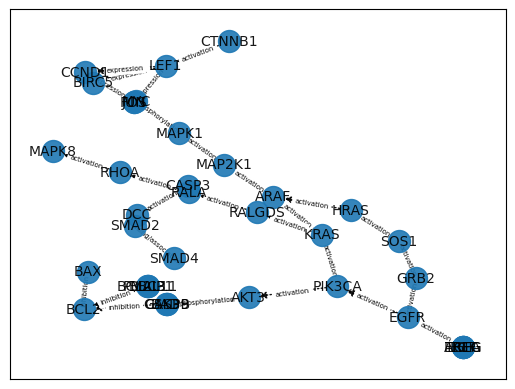

In [155]:
G = nx.from_pandas_edgelist(
    colorectal,
    source='source',
    target='target',
    edge_attr = ['relation','direction'],
    create_using = nx.DiGraph())

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k=0.8)

nx.draw_networkx(
    G, 
    pos = pos, 
    edge_color='black', 
    width=1, 
    linewidths=1,
    node_size=250, 
    #node_color='pink', 
    alpha=0.9, 
    font_size = 10,
    style = ':',
    with_labels = True,
    cmap = plt.cm.Reds,
)

edge_labels = nx.get_edge_attributes(G,'relation')
nx.draw_networkx_edge_labels(
    G,
    pos=pos,
    edge_labels=edge_labels,
    font_size=5,
    label_pos=0.5,
)